# Making a DFE changing gif

working off this tutorial: http://louistiao.me/posts/notebooks/save-matplotlib-animations-as-gifs/

had to install imagemagick ("brew install imagemagick")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
sns.set_style("white")

from matplotlib import animation, rc
from IPython.display import HTML, Image
%matplotlib inline

In [6]:
# Reading information of segregant fitness in our focal environment (from Jerison et al. 2017)
x_info = pd.read_csv('../jupyter_package/files/Clones_For_Tn96_Experiment.csv')
seg_to_fit = {i[0]: i[1] for i in x_info.as_matrix(['segregant', 'initial fitness, YPD 30C'])}
# Reading data files containing fitness effect information from the small library experiment (few (~100) mutations in many genetic backgrounds)
tp_all = pd.read_csv('../jupyter_package/files/TP_data_by_edge.csv')
# This excludes the neutral controls, a few mutations that were unintentionally included in this library, and a few controls that didn't end up getting good enough coverage to really analyze
tp = tp_all.loc[tp_all['Type']=='Experiment']

# Getting a list of segregants by looking for columns like segregant.mean.s in the dataframe
segs_all = [i.split('.')[0] for i in tp if '.mean.s' in i]
# Making restricted lists of segregants that have at least 70 mutations with s measured for this DFE animation
segs_use = [s for s in segs_all if len(tp.loc[pd.notnull(tp[s + '.mean.s'])])>=70]
# Making some 
sorted_segs = sorted(segs_use, key=lambda x: seg_to_fit[x])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


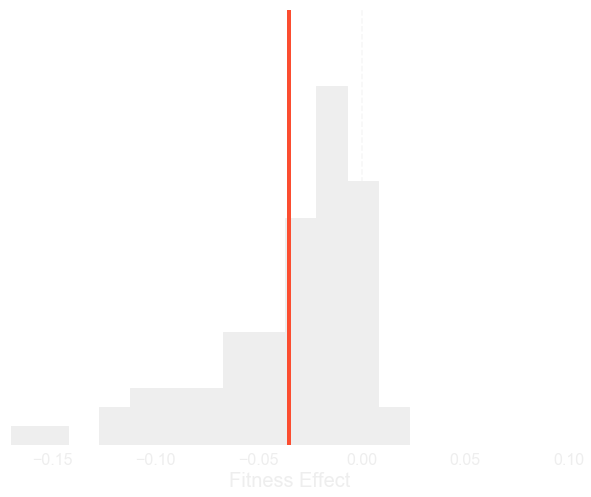

In [19]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = pl.subplots(figsize=(10,8))

def get_dfe(df, segname):
    use_df = df.loc[pd.notnull(df[segname + '.mean.s'])]
    return list(use_df[segname + '.mean.s'])


white_col = '#EEEEEE'
bin_lefts = [(-16.15+i)*0.015-0.005 for i in range(22)]
for i in range(len(sorted_segs)):
    d = get_dfe(tp, sorted_segs[i])
    ax.cla()
    ax.hist(d, bins=bin_lefts, facecolor=white_col, edgecolor=white_col, weights=np.ones_like(d)/float(len(d)))
    ax.axvline(x=0, linestyle='dashed', c=white_col, alpha=0.5)
    ax.set_xlim(( -0.17, 0.1))
    ax.set_ylim((0,0.32))
    ax.tick_params(axis='both', labelsize=16, color=white_col, labelcolor=white_col)
    ax.set_xlabel("Fitness Effect", fontsize=20, color=white_col)
    ax.set_yticks([])
    ax.axvline(x=np.mean(d), color='#FB4D30', lw=4)
    sns.despine(left=True, bottom=True)
    fig.savefig('../dfe_pngs/dfe' + str(i+1) + '.png', transparent=True)

In [61]:
len(sorted_segs)

81

In [58]:
# animation function. This is called sequentially
def update(i):
    d = get_dfe(tp, sorted_segs[i])
    ax.cla()
    ax.hist(d, bins=bin_lefts, facecolor="k", weights=np.ones_like(d)/float(len(d)))
    ax.axvline(x=0, linestyle='dashed', c='k', alpha=0.5)
    ax.set_xlim(( -0.17, 0.1))
    ax.set_ylim((0,0.32))
    ax.tick_params(axis='both', labelsize=16)
    ax.set_title(i)

# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, update, frames=len(sorted_segs), interval=20)

In [63]:
anim.save('animation.gif', writer='imagemagick', fps=5)

In [64]:
Image(url='animation.gif')